In [1]:
import numpy as np
import pandas as pd
import os.path
from random import randint

# -*- coding: utf-8 -*-
"""
### NOTES
This file is an example of what your code should look like. It is written in Python 3.6.
To know more about the expectations, please refer to the guidelines.
"""

#####
# DATA IMPORT
#####

# Where data is located
movies_file = './data/movies.csv'
users_file = './data/users.csv'
ratings_file = './data/ratings.csv'
predictions_file = './data/predictions.csv'
submission_file = './data/submission.csv'

# Read the data using pandas
movies_description = pd.read_csv(movies_file, delimiter=';', dtype={'movieID': 'int', 'year': 'int', 'movie': 'str'},
                                 names=['movieID', 'year', 'movie'])
users_description = pd.read_csv(users_file, delimiter=';',
                                dtype={'userID': 'int', 'gender': 'str', 'age': 'int', 'profession': 'int'},
                                names=['userID', 'gender', 'age', 'profession'])
ratings_description = pd.read_csv(ratings_file, delimiter=';',
                                  dtype={'userID': 'int', 'movieID': 'int', 'rating': 'int'},
                                  names=['userID', 'movieID', 'rating'])
predictions_description = pd.read_csv(predictions_file, delimiter=';', names=['userID', 'movieID'], header=None)

utility_matrix: pd.DataFrame = \
        ratings_description.pivot(index='userID', columns='movieID', values='rating').T
utility_matrix

userID,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
movieID,,,,,,,,,,,,,,,,,,,,,
1,5.0,NaN,NaN,NaN,NaN,4.0,NaN,4.0,5.0,5.0,...,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3702,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3703,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3704,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
##### Construct Utility Matrix ####### 
R = np.zeros((len(movies_description), len(users_description)))

for user, movie, rating in ratings_description.values:
    R[movie-1, user-1] = rating

R[R==0] = np.nan
print(f"Shape of Utility matrix is (movies, users): {R.shape}")

Shape of Utility matrix is (movies, users): (3706, 6040)


In [48]:
from tqdm.auto import tqdm

EPOCHS = 100
LEARNING_RATE = 0.0001
LAMBDA = 0.1


K = 2 # number of factors to work with.

# np.random.seed(42)

# ratings = ratings_description.values.copy()
# ratings[:, 0:2] = ratings[:, 0:2] - 1
# Q = np.random.uniform(-1, 1, (R.shape[0], K)) # movies
# P = np.random.uniform(-1, 1, (K, R.shape[1])) # users
# div = (R.shape[0] * R.shape[1]) - np.isnan(R).sum()
# RMSE = np.sqrt(((np.nan_to_num(R - np.matmul(Q, P), 0)**2).sum())/div)
# print(f"Starting RMSE: {RMSE}")

# #### LATENT FACTORS HYPERPARAMETERS ####

# objectives = []
for epoch in tqdm(range(EPOCHS)):
#     np.random.shuffle(ratings) # inplace shuffle of matrix
    R_pred = np.matmul(Q, P)
    print(np.min(Q), np.max(Q))
    curr_error = 2*np.nan_to_num(R - R_pred, 0)
    for userID, movieID, rating in ratings:
        q_update = LEARNING_RATE * (curr_error[movieID, userID]*P[:, userID] - LAMBDA*Q[movieID, :])
        Q[movieID, :] = Q[movieID, :] + q_update

        p_update = LEARNING_RATE * (curr_error[movieID, userID]*Q[movieID, :] - LAMBDA*P[:, userID])
        P[:, userID] = P[:, userID] + p_update

    RMSE_i = np.sqrt(((np.nan_to_num(R - np.matmul(Q, P), 0)**2).sum())/div)
    print(f"RMSE {epoch}: {RMSE_i}")
    objectives.append([epoch, RMSE_i])

RMSE = np.sqrt(((np.nan_to_num(R - np.matmul(Q, P), 0)**2).sum())/div)
print(f"Final RMSE: {RMSE}")

-1.2587510664051875 2.620310734469047
RMSE 0: 0.9061183810522365
-1.2591258646327308 2.619402297752408
RMSE 1: 0.9060619653037187
-1.2594960650483675 2.6184963941734654
RMSE 2: 0.9060061314762439
-1.2598617124719842 2.6175931182813788
RMSE 3: 0.9059508666512186
-1.2602228513265916 2.6166925599500552
RMSE 4: 0.9058961582189162
-1.260579525641595 2.615794804550556
RMSE 5: 0.9058419938694183
-1.2609317790560348 2.6148999331176994
RMSE 6: 0.9057883615838862
-1.2612796548217997 2.614008022511046
RMSE 7: 0.9057352496261133
-1.2616231958068103 2.613119145570456
RMSE 8: 0.9056826465343697
-1.2619624444981759 2.612233371266381
RMSE 9: 0.905630541113519
-1.262297443005322 2.6113507648450414
RMSE 10: 0.9055789224273973
-1.2626282330630918 2.6104713879686843
RMSE 11: 0.9055277797914437
-1.2629548560348196 2.609595298851049
RMSE 12: 0.9054771027655923
-1.2632773529153773 2.6087225523882074
RMSE 13: 0.9054268811473718
-1.2635957643341962 2.607853200284924
RMSE 14: 0.9053771049652605
-1.2639101305582

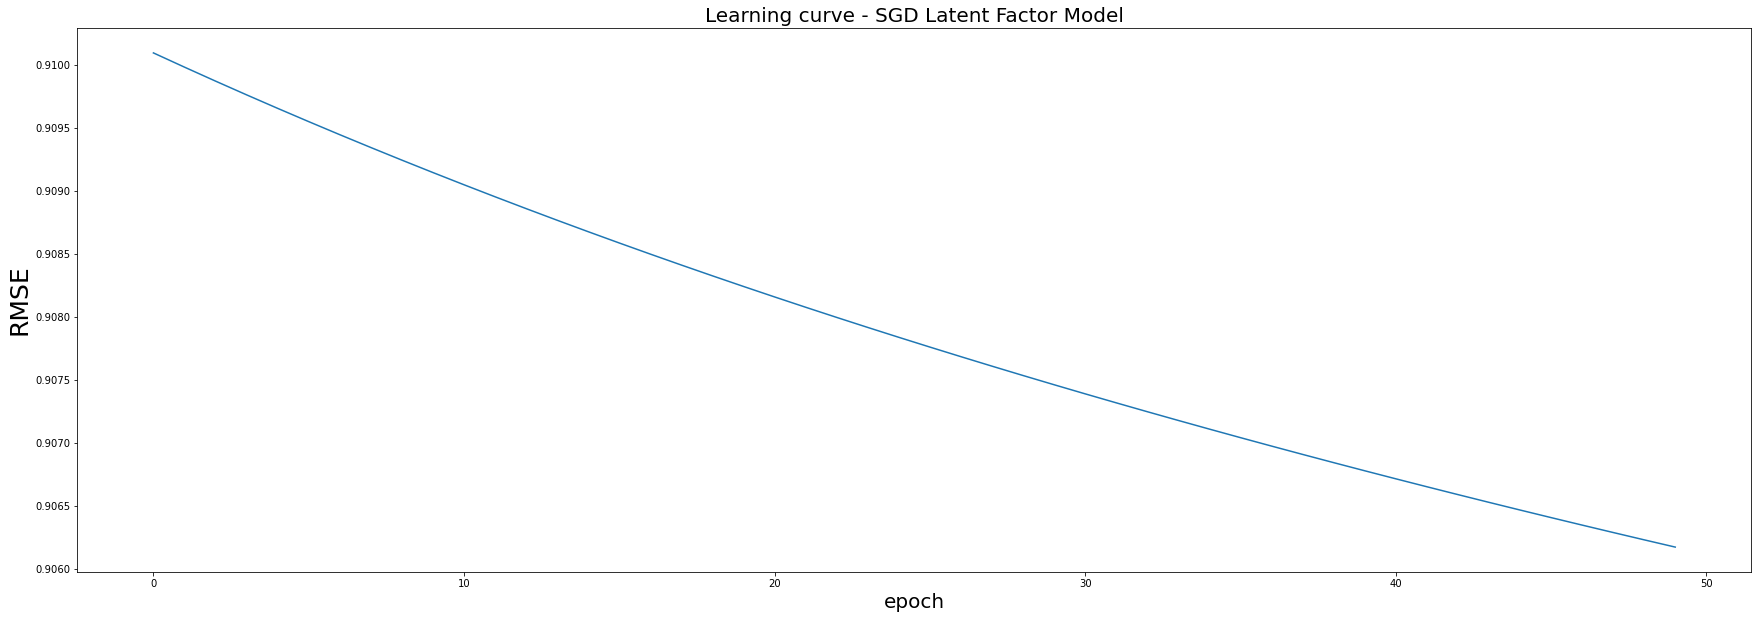

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(30, 10))
plt.title("Learning curve - SGD Latent Factor Model", fontsize=20)
plt.xlabel("epoch", fontsize=20)
plt.ylabel("RMSE", fontsize=25)
plt.plot(np.array(objectives)[-50:, 1])
plt.savefig("figures/SGD-latent-factor.png")

In [47]:
#### CREATE SUBMISSION ####
submission = []
R_pred = np.matmul(Q, P)
for i, [user,movie] in enumerate(predictions_description.values):
    submission.append([i+1, R_pred[movie-1,user-1]])

submission_df = pd.DataFrame(submission, columns=["Id", "Rating"])
submission_df.to_csv("data/submission.csv", index=False)